In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib.cm as cm
%matplotlib inline  
from sklearn.decomposition import PCA


# image number to output
IMAGE_TO_DISPLAY = 20212

Accessing the data.

In [3]:
data = pd.read_csv('train.csv')
data_t = pd.read_csv('test.csv')

print('data({0[0]},{0[1]})'.format(data.shape))
print (data.head())

data(42000,785)
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0   

In [4]:
images = data.iloc[:,1:].values
images_t = data_t.iloc[:,:].values 
images = images.astype(np.float)
images_t = images_t.astype(np.float)
images = np.multiply(images, 1.0 / 255.0)
images_t = np.multiply(images_t, 1.0 / 255.0)
print('images({0[0]},{0[1]})'.format(images.shape))
print('images_t({0[0]},{0[1]})'.format(images_t.shape))


images(42000,784)
images_t(28000,784)


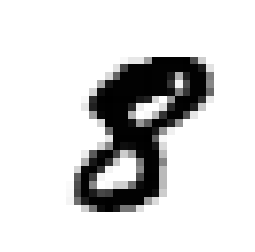

In [5]:
# display image
def display(img):
    
    # (784) => (28,28)
    one_image = img.reshape(28,28)
    
    plt.axis('off')
    plt.imshow(one_image, cmap=cm.binary)

# output image     
display(images[10])

In [6]:
X = images
y = data.iloc[:,0].values
print(y.shape[0])

42000


In [7]:
pca = PCA(n_components=100,svd_solver ='full', whiten = True)
pca.fit(X)
X_ = pca.transform(X)
print(X_.shape, pca.noise_variance_)

((42000, 100), 0.0065595519315426462)


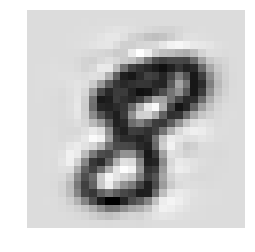

In [8]:


# output image
test = pca.inverse_transform(X_[10])
display(test)

In [ ]:
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import GridSearchCV

# nn = MLPClassifier(hidden_layer_sizes = (25,25,), solver='sgd', activation = 'logistic',learning_rate_init=0.01,learning_rate='invscaling')
nn = MLPClassifier(hidden_layer_sizes=(50, 25),learning_rate_init=0.1,shuffle=True, max_iter=200,  verbose=True, tol=1e-4, random_state=1)

parameter_grid = {'alpha': [1e-3, 3e-4, 1e-4, 3e-3, 1e-2],
                  'activation': ['logistic','indentity'],
                  'solver': ['sgd', 'adam']  
                 }

cross_validation = StratifiedKFold(n_splits= 10 )


grid_search = GridSearchCV(nn,
                           param_grid=parameter_grid,
                           cv=cross_validation)


grid_search.fit(X_, y)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))



Iteration 1, loss = 1.82982361
Iteration 2, loss = 0.48327908
Iteration 3, loss = 0.33798879
Iteration 4, loss = 0.27971064
Iteration 5, loss = 0.24113217
Iteration 6, loss = 0.21310501
Iteration 7, loss = 0.19095748
Iteration 8, loss = 0.17336554
Iteration 9, loss = 0.15861888
Iteration 10, loss = 0.14628828
Iteration 11, loss = 0.13597700
Iteration 12, loss = 0.12617875
Iteration 13, loss = 0.11818810
Iteration 14, loss = 0.11073158
Iteration 15, loss = 0.10420493
Iteration 16, loss = 0.09859914
Iteration 17, loss = 0.09289349
Iteration 18, loss = 0.08770030
Iteration 19, loss = 0.08376428
Iteration 20, loss = 0.07910345
Iteration 21, loss = 0.07506046
Iteration 22, loss = 0.07204661
Iteration 23, loss = 0.06852400
Iteration 24, loss = 0.06525537
Iteration 25, loss = 0.06247766
Iteration 26, loss = 0.05957101
Iteration 27, loss = 0.05697548
Iteration 28, loss = 0.05436399
Iteration 29, loss = 0.05207830
Iteration 30, loss = 0.04997802
Iteration 31, loss = 0.04784019
Iteration 32, los

Iteration 66, loss = 0.01733441
Iteration 67, loss = 0.01705114
Iteration 68, loss = 0.01682720
Iteration 69, loss = 0.01662864
Iteration 70, loss = 0.01638417
Iteration 71, loss = 0.01618831
Iteration 72, loss = 0.01596824
Iteration 73, loss = 0.01579813
Iteration 74, loss = 0.01568774
Iteration 75, loss = 0.01543554
Iteration 76, loss = 0.01527961
Iteration 77, loss = 0.01514786
Iteration 78, loss = 0.01503131
Iteration 79, loss = 0.01490040
Iteration 80, loss = 0.01474672
Iteration 81, loss = 0.01464853
Iteration 82, loss = 0.01453787
Iteration 83, loss = 0.01440209
Iteration 84, loss = 0.01432723
Iteration 85, loss = 0.01418460
Iteration 86, loss = 0.01408962
Iteration 87, loss = 0.01397330
Iteration 88, loss = 0.01390409
Iteration 89, loss = 0.01380785
Iteration 90, loss = 0.01374179
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.82902433
Iteration 2, loss = 0.47811152
Iteration 3, loss = 0.33571414
Iteration 4, los

Iteration 42, loss = 0.03410158
Iteration 43, loss = 0.03297584
Iteration 44, loss = 0.03219157
Iteration 45, loss = 0.03108494
Iteration 46, loss = 0.03014179
Iteration 47, loss = 0.02947013
Iteration 48, loss = 0.02891317
Iteration 49, loss = 0.02763440
Iteration 50, loss = 0.02710571
Iteration 51, loss = 0.02636165
Iteration 52, loss = 0.02569707
Iteration 53, loss = 0.02507220
Iteration 54, loss = 0.02463479
Iteration 55, loss = 0.02406059
Iteration 56, loss = 0.02355841
Iteration 57, loss = 0.02305389
Iteration 58, loss = 0.02255980
Iteration 59, loss = 0.02217281
Iteration 60, loss = 0.02169957
Iteration 61, loss = 0.02132677
Iteration 62, loss = 0.02086967
Iteration 63, loss = 0.02210017
Iteration 64, loss = 0.02055303
Iteration 65, loss = 0.01993001
Iteration 66, loss = 0.02155773
Iteration 67, loss = 0.01958142
Iteration 68, loss = 0.01912628
Iteration 69, loss = 0.01874220
Iteration 70, loss = 0.02209232
Iteration 71, loss = 0.01878600
Iteration 72, loss = 0.01815398
Iteratio

Iteration 100, loss = 0.01400639
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.82654956
Iteration 2, loss = 0.48209011
Iteration 3, loss = 0.34315613
Iteration 4, loss = 0.28685264
Iteration 5, loss = 0.24079742
Iteration 6, loss = 0.21211500
Iteration 7, loss = 0.19787215
Iteration 8, loss = 0.17977520
Iteration 9, loss = 0.15850122
Iteration 10, loss = 0.16364356
Iteration 11, loss = 0.14065655
Iteration 12, loss = 0.12867062
Iteration 13, loss = 0.12010401
Iteration 14, loss = 0.11519620
Iteration 15, loss = 0.10439141
Iteration 16, loss = 0.10043998
Iteration 17, loss = 0.09747824
Iteration 18, loss = 0.08848218
Iteration 19, loss = 0.09503991
Iteration 20, loss = 0.08127551
Iteration 21, loss = 0.07613525
Iteration 22, loss = 0.07105147
Iteration 23, loss = 0.06806593
Iteration 24, loss = 0.07907385
Iteration 25, loss = 0.06633431
Iteration 26, loss = 0.06007680
Iteration 27, loss = 0.05677194
Iteration 28, loss = 

Iteration 8, loss = 0.37964147
Iteration 9, loss = 0.41345812
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.89057542
Iteration 2, loss = 0.43399595
Iteration 3, loss = 0.42255788
Iteration 4, loss = 0.39052530
Iteration 5, loss = 0.39617021
Iteration 6, loss = 0.48914009
Iteration 7, loss = 0.41351416
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.79932357
Iteration 2, loss = 0.43807295
Iteration 3, loss = 0.42407670
Iteration 4, loss = 0.42817426
Iteration 5, loss = 0.42445706
Iteration 6, loss = 0.41727663
Iteration 7, loss = 0.43503732
Iteration 8, loss = 0.44048713
Iteration 9, loss = 0.45699643
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.81868908
Iteration 2, loss = 0.45049843
Iteration 3, loss = 0.43347403
Iteration 4, loss = 0.45905147
Iteration 5, loss = 0.42731622
Iteration 6, l

Iteration 23, loss = 0.06361739
Iteration 24, loss = 0.06070348
Iteration 25, loss = 0.05756549
Iteration 26, loss = 0.05479367
Iteration 27, loss = 0.05233603
Iteration 28, loss = 0.04976664
Iteration 29, loss = 0.04718139
Iteration 30, loss = 0.04518503
Iteration 31, loss = 0.04248305
Iteration 32, loss = 0.04090884
Iteration 33, loss = 0.03883367
Iteration 34, loss = 0.03738632
Iteration 35, loss = 0.03561426
Iteration 36, loss = 0.03398884
Iteration 37, loss = 0.03261691
Iteration 38, loss = 0.03115231
Iteration 39, loss = 0.02960026
Iteration 40, loss = 0.02835090
Iteration 41, loss = 0.02692863
Iteration 42, loss = 0.02603258
Iteration 43, loss = 0.02493094
Iteration 44, loss = 0.02402705
Iteration 45, loss = 0.02285210
Iteration 46, loss = 0.02209281
Iteration 47, loss = 0.02104426
Iteration 48, loss = 0.02020722
Iteration 49, loss = 0.01966229
Iteration 50, loss = 0.01884580
Iteration 51, loss = 0.01812914
Iteration 52, loss = 0.01755977
Iteration 53, loss = 0.01698066
Iteratio

Iteration 87, loss = 0.00776459
Iteration 88, loss = 0.00768642
Iteration 89, loss = 0.00757277
Iteration 90, loss = 0.00750101
Iteration 91, loss = 0.00737691
Iteration 92, loss = 0.00729235
Iteration 93, loss = 0.00721612
Iteration 94, loss = 0.00714675
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.82726153
Iteration 2, loss = 0.47714061
Iteration 3, loss = 0.33236299
Iteration 4, loss = 0.27499180
Iteration 5, loss = 0.23584379
Iteration 6, loss = 0.20732856
Iteration 7, loss = 0.19137249
Iteration 8, loss = 0.16863516
Iteration 9, loss = 0.15414170
Iteration 10, loss = 0.14184125
Iteration 11, loss = 0.13158600
Iteration 12, loss = 0.19885006
Iteration 13, loss = 0.12853187
Iteration 14, loss = 0.11486160
Iteration 15, loss = 0.10521254
Iteration 16, loss = 0.09750412
Iteration 17, loss = 0.09179422
Iteration 18, loss = 0.08654770
Iteration 19, loss = 0.08130566
Iteration 20, loss = 0.07659505
Iteration 21, loss = 0

Iteration 50, loss = 0.02136370
Iteration 51, loss = 0.02038070
Iteration 52, loss = 0.01992368
Iteration 53, loss = 0.01997451
Iteration 54, loss = 0.01875272
Iteration 55, loss = 0.01896425
Iteration 56, loss = 0.01774635
Iteration 57, loss = 0.01724413
Iteration 58, loss = 0.01653511
Iteration 59, loss = 0.01602432
Iteration 60, loss = 0.01546201
Iteration 61, loss = 0.01511752
Iteration 62, loss = 0.01477851
Iteration 63, loss = 0.01427153
Iteration 64, loss = 0.01399042
Iteration 65, loss = 0.01367624
Iteration 66, loss = 0.01325104
Iteration 67, loss = 0.01296351
Iteration 68, loss = 0.01266544
Iteration 69, loss = 0.01240890
Iteration 70, loss = 0.01216145
Iteration 71, loss = 0.01188250
Iteration 72, loss = 0.01411377
Iteration 73, loss = 0.01184504
Iteration 74, loss = 0.01142133
Iteration 75, loss = 0.01122492
Iteration 76, loss = 0.01077642
Iteration 77, loss = 0.01056078
Iteration 78, loss = 0.01031034
Iteration 79, loss = 0.01013368
Iteration 80, loss = 0.00994637
Iteratio

Iteration 1, loss = 0.81838709
Iteration 2, loss = 0.43845026
Iteration 3, loss = 0.38637382
Iteration 4, loss = 0.37230464
Iteration 5, loss = 0.36856635
Iteration 6, loss = 0.36484592
Iteration 7, loss = 0.35268733
Iteration 8, loss = 0.35547022
Iteration 9, loss = 0.35603123
Iteration 10, loss = 0.34812799
Iteration 11, loss = 0.35014525
Iteration 12, loss = 0.35715827
Iteration 13, loss = 0.35863038
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.74508272
Iteration 2, loss = 0.38902097
Iteration 3, loss = 0.38130065
Iteration 4, loss = 0.36303076
Iteration 5, loss = 0.35417249
Iteration 6, loss = 0.34969519
Iteration 7, loss = 0.34727175
Iteration 8, loss = 0.34051039
Iteration 9, loss = 0.34527666
Iteration 10, loss = 0.35212464
Iteration 11, loss = 0.34908484
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.25601123
Iteration 2, loss = 0.65570071
Iterat

Iteration 13, loss = 0.11439010
Iteration 14, loss = 0.10661669
Iteration 15, loss = 0.09986518
Iteration 16, loss = 0.09350034
Iteration 17, loss = 0.08745663
Iteration 18, loss = 0.08263094
Iteration 19, loss = 0.07757184
Iteration 20, loss = 0.07315301
Iteration 21, loss = 0.06872381
Iteration 22, loss = 0.06482814
Iteration 23, loss = 0.06173172
Iteration 24, loss = 0.05823930
Iteration 25, loss = 0.05532162
Iteration 26, loss = 0.05264212
Iteration 27, loss = 0.05007449
Iteration 28, loss = 0.04730352
Iteration 29, loss = 0.04542154
Iteration 30, loss = 0.04297498
Iteration 31, loss = 0.04065992
Iteration 32, loss = 0.03896951
Iteration 33, loss = 0.03721920
Iteration 34, loss = 0.03538147
Iteration 35, loss = 0.03343367
Iteration 36, loss = 0.03213772
Iteration 37, loss = 0.03066129
Iteration 38, loss = 0.02933797
Iteration 39, loss = 0.02815275
Iteration 40, loss = 0.02660146
Iteration 41, loss = 0.02549768
Iteration 42, loss = 0.02439151
Iteration 43, loss = 0.02329721
Iteratio

Iteration 76, loss = 0.00736866
Iteration 77, loss = 0.00723405
Iteration 78, loss = 0.00702103
Iteration 79, loss = 0.00688604
Iteration 80, loss = 0.00672519
Iteration 81, loss = 0.00656494
Iteration 82, loss = 0.00644101
Iteration 83, loss = 0.00632176
Iteration 84, loss = 0.00617804
Iteration 85, loss = 0.00609288
Iteration 86, loss = 0.00595626
Iteration 87, loss = 0.00584823
Iteration 88, loss = 0.00574077
Iteration 89, loss = 0.00563268
Iteration 90, loss = 0.00551953
Iteration 91, loss = 0.00544096
Iteration 92, loss = 0.00535396
Iteration 93, loss = 0.00528179
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.82809225
Iteration 2, loss = 0.48135617
Iteration 3, loss = 0.33603201
Iteration 4, loss = 0.27760767
Iteration 5, loss = 0.23899098
Iteration 6, loss = 0.21009744
Iteration 7, loss = 0.18717446
Iteration 8, loss = 0.16961267
Iteration 9, loss = 0.15519675
Iteration 10, loss = 0.14261404
Iteration 11, loss = 0

Iteration 35, loss = 0.04775817
Iteration 36, loss = 0.03517376
Iteration 37, loss = 0.03225126
Iteration 38, loss = 0.03006787
Iteration 39, loss = 0.02837149
Iteration 40, loss = 0.02692058
Iteration 41, loss = 0.02561607
Iteration 42, loss = 0.02484920
Iteration 43, loss = 0.02354620
Iteration 44, loss = 0.02251819
Iteration 45, loss = 0.02147866
Iteration 46, loss = 0.02062829
Iteration 47, loss = 0.01969882
Iteration 48, loss = 0.01899800
Iteration 49, loss = 0.02452266
Iteration 50, loss = 0.01857837
Iteration 51, loss = 0.01712822
Iteration 52, loss = 0.01617540
Iteration 53, loss = 0.01549711
Iteration 54, loss = 0.01510944
Iteration 55, loss = 0.01435893
Iteration 56, loss = 0.01381694
Iteration 57, loss = 0.01326891
Iteration 58, loss = 0.01282318
Iteration 59, loss = 0.01241915
Iteration 60, loss = 0.01201443
Iteration 61, loss = 0.01155591
Iteration 62, loss = 0.01115255
Iteration 63, loss = 0.01974112
Iteration 64, loss = 0.01174883
Iteration 65, loss = 0.01078520
Iteratio

In [ ]:
# nn.fit(X_[0:30000],y[0:30000])

# train_predict = nn.predict(X_)

# print(train_predict)

# test_predict = nn.predict(pca.transform(images_t))
# print(test_predict[10])

# print(nn.score(X_[0:30000],y[0:30000]))
# print(nn.score(X_[30001:41999],y[30001:41999]))

In [ ]:
grid_visualization = []

for grid_pair in grid_search.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)
    
grid_visualization = np.array(grid_visualization)
grid_visualization.shape = (5, 4)
sb.heatmap(grid_visualization, cmap='Blues')
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'][::-1])
plt.xlabel('max_features')
plt.ylabel('max_depth')

In [ ]:
output=[]
for i in range(1,test_predict.shape[0]+1):
    output.append([(i),(test_predict[i-1])])
    
# print(output)

# np.insert(output,[0,0],["ImageId", "Label"])
print(output)

# output.to_csv("trial1.csv")delimiter=
np.savetxt("trial1.csv",output,delimiter=',', fmt='%d', header='\b\bImageId,Label')

In [ ]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = nn.coefs_[0].min(), nn.coefs_[0].max()
for coef, ax in zip(nn.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()